In [56]:
import numpy as np, matplotlib.pyplot as plt
from create_ordered_AP_arrays import create_ordered_AP_arrays
from astropy.io import ascii as asc

%matplotlib inline

In [74]:
FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
mainseq_corrs = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl_ref.txt',
                         guess=False, format='fixed_width_two_line', delimiter=' ')
filt = np.array(mainseq_corrs['filt'])
stlr_mass = np.array(mainseq_corrs['stlr_mass'])
inst_str0 = np.array(mainseq_corrs['inst_str0'])
ha_ii = np.array(mainseq_corrs['ID'])-1

datadict = create_ordered_AP_arrays()
ha_flux = datadict['HA_FLUX'][ha_ii]
niia_flux = datadict['NIIA_FLUX'][ha_ii]
niia_snr = datadict['NIIA_SNR'][ha_ii]
niib_flux = datadict['NIIB_FLUX'][ha_ii]
niib_snr = datadict['NIIB_SNR'][ha_ii]

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered LMIN0/LMAX0 arrs
### done creating ordered LMIN0/LMAX0 arr
### creating ordered SNR arrs
### done creating ordered SNR arrs
### creating ordered FLUX arrs
### done creating ordered FLUX arrs


## checking that the ratio of the nii fluxes is generally around 2.96

In [58]:
aa = np.array([x for x in range(len(niia_flux)) if niia_flux[x]>0 and niia_flux[x]<99])
bb = np.array([x for x in range(len(niib_flux)) if niib_flux[x]>0 and niib_flux[x]<99])
cc = np.array([x for x in aa if x in bb])

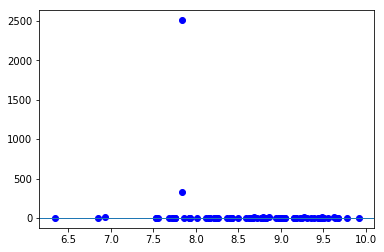

[  1.63946160e-10   1.37810014e-01   4.30057173e-01   4.74174781e-01
   5.29356238e-01   7.15083732e-01   7.91232536e-01   8.49358009e-01
   9.34040205e-01   9.47129810e-01   1.00339230e+00   1.00969491e+00
   1.05079511e+00   1.26472731e+00   1.28807658e+00   1.30381965e+00
   1.37850309e+00   1.41041750e+00   1.62609008e+00   1.65317197e+00
   1.65636678e+00   1.78088758e+00   1.80908845e+00   1.81115144e+00
   1.92805253e+00   1.96129247e+00   2.00960666e+00   2.03522781e+00
   2.06410486e+00   2.20600006e+00   2.20831858e+00   2.25194677e+00
   2.27822241e+00   2.29004398e+00   2.29410992e+00   2.34821416e+00
   2.37293660e+00   2.38258722e+00   2.40110910e+00   2.42819737e+00
   2.42944545e+00   2.55862475e+00   2.59353423e+00   2.64306476e+00
   2.69099923e+00   2.77205192e+00   2.81242667e+00   2.84741622e+00
   2.87234875e+00   2.89284077e+00   2.96109952e+00   3.02345987e+00
   3.08765196e+00   3.17253160e+00   3.23334871e+00   3.29870630e+00
   3.30151256e+00   3.37200148e+00

In [59]:
plt.plot(stlr_mass[cc], niib_flux[cc]/niia_flux[cc], 'bo')
plt.axhline(2.96)
plt.show()

print np.sort(niib_flux[cc]/niia_flux[cc])

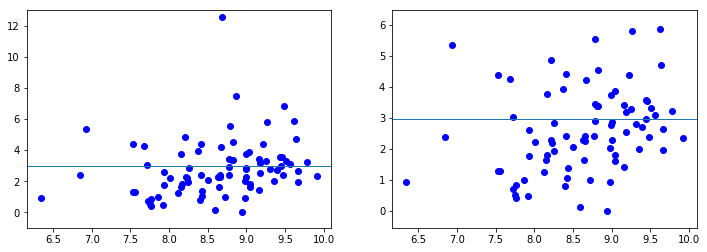

In [65]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,4)

axes[0].plot(stlr_mass[cc], niib_flux[cc]/niia_flux[cc], 'bo')
axes[0].axhline(2.96)
axes[0].set_ylim([-1,13])

axes[1].plot(stlr_mass[cc], niib_flux[cc]/niia_flux[cc], 'bo')
axes[1].axhline(2.96)
axes[1].set_ylim([2.96-3.5,2.96+3.5])

plt.show()

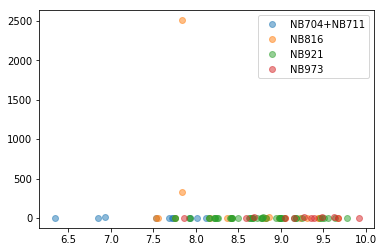

In [63]:
for ff in ['NB704+NB711', 'NB816', 'NB921', 'NB973']:
    fmatch = np.array([x for x in range(len(cc)) if filt[cc][x] in ff])
    plt.plot(stlr_mass[cc[fmatch]], niib_flux[cc[fmatch]]/niia_flux[cc[fmatch]], 'o', alpha=0.5, label=ff)
    
plt.legend()
plt.show()

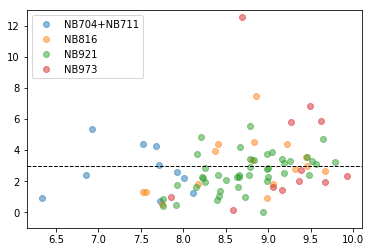

In [69]:
for ff in ['NB704+NB711', 'NB816', 'NB921', 'NB973']:
    fmatch = np.array([x for x in range(len(cc)) if filt[cc][x] in ff])
    plt.plot(stlr_mass[cc[fmatch]], niib_flux[cc[fmatch]]/niia_flux[cc[fmatch]], 'o', alpha=0.5, label=ff)
    
plt.ylim([-1,13])
plt.axhline(2.96, color='black', ls='--')
plt.legend()
plt.show()

## finding where we get both nii coverage (for both mmt and keck)

In [71]:
big_good_niib = np.array([x for x in range(len(niib_snr)) 
                          if (niib_snr[x] >= 2 and niib_flux[x] != 0 and ha_flux[x] < 99)])
len(big_good_niib)

110

In [75]:
big_good_niia = np.array([x for x in range(len(niia_snr)) 
                          if (niia_snr[x] >= 2 and niia_flux[x] != 0 and ha_flux[x] < 99)])
len(big_good_niia)

80

#### these sources have "good" detections in nii 6548 but not nii 6583  (seems like a possibility, esp. w/ nb921)

In [96]:
from astropy.table import Table

In [93]:
a_not_b = np.array([x for x in big_good_niia if x not in big_good_niib])

In [101]:
Table([mainseq_corrs['NAME0'].data[a_not_b], mainseq_corrs['inst_str0'].data[a_not_b],
       niia_flux[a_not_b], niia_snr[a_not_b], niib_flux[a_not_b],  niib_snr[a_not_b]], 
      names=['name0', 'inst_str0', 'niia_flux', 'niia_snr', 'niib_flux', 'niib_snr'])

name0,inst_str0,niia_flux,niia_snr,niib_flux,niib_snr
str51,str13,float64,float64,float64,float64
OIII-NB704_045386_Ha-NB921_074253,"merged,",1.73552011517e-18,2.49776935577,0.0,49.9726753235
OIII-NB704_048683_Ha-NB921_078312,"merged,",5.40466236497e-18,2.40370774269,2.56275459594e-18,0.233563318849
OIII-NB704_049500_Ha-NB921_079094,"MMT,",4.5565906413e-16,9.95265769958,0.0,1.05144786835
OIII-NB704_050874_Ha-NB921_080954,"merged,",1.86724611615e-18,4.69550132751,99.9990005493,0.0
OIII-NB704_065690_Ha-NB921_098686,"merged,",9.85917107547e-18,8.06308460236,99.9990005493,0.0
OIII-NB704_105465_Ha-NB921_147393,"merged,",2.78602965563e-18,2.9461786747,-2.27125535051e-19,-0.418837964535
OIII-NB704_135110_Ha-NB921_191206,"MMT,",5.60942865191e-17,2.04109454155,-1.0,-1.0
OIII-NB711_102472_Ha-NB973_156739,"merged,",2.517663031e-18,3.73954033852,99.9990005493,0.0
Ha-NB921_052748,"merged,",1.01404123751e-17,8.88110733032,99.9990005493,0.0


#### these sources have "good" detections in nii 6583 but not nii 6548  (... i'm not sure how or why)

In [102]:
b_not_a = np.array([x for x in big_good_niib if x not in big_good_niia])

In [107]:
Table([mainseq_corrs['NAME0'].data[b_not_a], mainseq_corrs['inst_str0'].data[b_not_a],
       niia_flux[b_not_a], niia_snr[b_not_a], niib_flux[b_not_a],  niib_snr[b_not_a]], 
      names=['name0', 'inst_str0', 'niia_flux', 'niia_snr', 'niib_flux', 'niib_snr'])

name0,inst_str0,niia_flux,niia_snr,niib_flux,niib_snr
str51,str13,float64,float64,float64,float64
Ha-NB704_009999,"MMT,",99.9990005493,0.0,1.66283367152e-17,8.9449224472
OIII-NB704_026198_Ha-NB921_050258,"merged,",1.95038099192e-18,1.35487771034,5.55354646876e-18,2.98649024963
OIII-NB704_028993_Ha-NB921_054178,"merged,",1.13821960398e-18,0.504923582077,4.30575832576e-18,3.75481271744
Ha-NB704_038884_Ha-NB711_032808,"MMT,",99.9990005493,0.0,1.05463132041e-17,3.20940876007
OIII-NB704_047277_Ha-NB921_076691,"merged,",99.9990005493,0.0,4.0602928682e-18,8.01896190643
OIII-NB704_053974_Ha-NB921_084866,"Keck,",99.9990005493,0.0,7.95584846738e-18,10.722492218
OIII-NB704_054502_Ha-NB921_085332,"merged,",99.9990005493,0.0,1.02223580752e-18,2.20261955261
OIII-NB704_055305_Ha-NB921_086493,"merged,",99.9990005493,0.0,5.10337199481e-18,3.92558431625
OIII-NB704_064938_Ha-NB921_097834,"Keck,",99.9990005493,0.0,1.75031293366e-17,15.469953537


#### these sources have "good" detections in both nii lines

In [109]:
a_and_b = np.array([x for x in big_good_niia if x in big_good_niib])
len(a_and_b)

66

In [111]:
overlapping_inst = mainseq_corrs['inst_str0'].data[a_and_b]

In [112]:
len([x for x in overlapping_inst if 'MMT' in x or 'merged' in x])

54

In [113]:
len([x for x in overlapping_inst if 'Keck' in x or 'merged' in x])

53

In [114]:
len([x for x in overlapping_inst if 'merged' in x])

41